# Dow Jones Industrial Averages

<br>MarketWatch [Dow Jones Industrial Average](https://www.marketwatch.com/investing/index/djia) <br>
<br>Use the following to download a csv file 
<br>[Download Data](https://www.marketwatch.com/investing/index/djia/download-data) <br>
Specify the date range for the data and select "DOWNLOAD DATA (.CSV)" <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

Save the data to a file on your computer and modify the following to specify its location.

In [2]:
filename = '/home/cgreco/Downloads/DowJones_23_24_new.csv'
df = pd.read_csv(filename)

In [3]:
# Reverse from decreasing to increasing chronological order
df = df.iloc[::-1]

# Convert data from string to float type first removing commas
df['Open'] = df['Open'].str.replace(',','').astype(float)
df['High'] = df['High'].str.replace(',','').astype(float)
df['Low'] = df['Low'].str.replace(',','').astype(float)
df['Close'] = df['Close'].str.replace(',','').astype(float)
# Convert date in string format to date data type
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
#print(df)

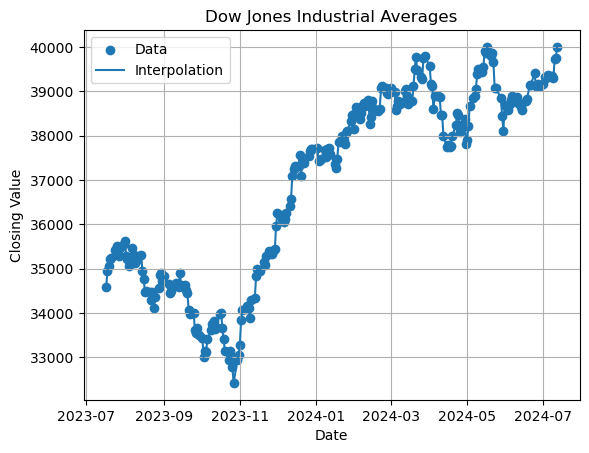

In [4]:
plt.figure()
#plt.plot(df['Date'],df['Close'])
plt.scatter(df['Date'],df['Close'],label='Data')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('Dow Jones Industrial Averages')
day_index = pd.date_range(start = df['Date'].min(), end = df['Date'].max(), freq='D')
interp_values = np.interp(day_index, df['Date'], df['Close'])
plt.plot(day_index, interp_values, label='Interpolation')
plt.legend(loc = "best")
#coef = np.polyfit(day_index.to_numpy(), interp_values, 3)
#print(coef)


Interpolate data for days market is closed

Text(0.5, 1.0, 'Dow Jones Industrial Averages (Interpolated & Detrended)')

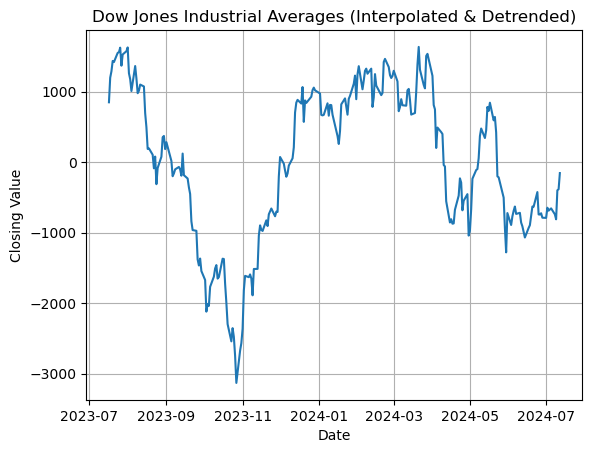

In [5]:

plt.figure()
detrended_interp_values = signal.detrend(interp_values,type='linear')
plt.plot(day_index,detrended_interp_values)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('Dow Jones Industrial Averages (Interpolated & Detrended)')

Power Spectral Density

Text(0.5, 1.0, 'Power Spectral Density (Interpolated & Detrended Values)')

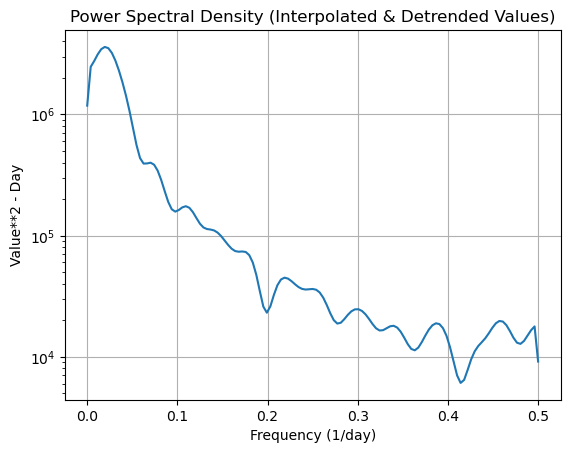

In [7]:
f, Pxx = signal.welch(detrended_interp_values,fs=1.0,window='hann',nperseg=60,
        noverlap=30,nfft=256,detrend='linear',return_onesided=True,scaling='density')

plt.figure()
plt.semilogy(f, Pxx)
plt.grid()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Value**2 - Day')
plt.title('Power Spectral Density (Interpolated & Detrended Values)')
